<a href="https://colab.research.google.com/github/NileshCT/EDA_PROJECT/blob/main/EDA_analysis_practice_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#Below are the libraries that are used in order to perform EDA (Exploratory data analysis).
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import accuracy_score, classification_report
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Import CSV file from google drive:
data=pd.read_csv("/content/drive/MyDrive/ds_salaries.csv")


In [ ]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
data.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [ ]:
data.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
#Lets display non-null value from data frame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [ ]:
#Lets understand the number of rows and column in dataset.
#Given dataset consist of 66368 rows and total 14 column.
data.shape

(607, 12)

In [ ]:
#Lets explore the unique status available in the dataset.
data['work_year'].unique()

array([2020, 2021, 2022])

In [ ]:
data['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [ ]:
data['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [ ]:
data['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [ ]:
data['salary_currency'].unique()

array(['EUR', 'USD', 'GBP', 'HUF', 'INR', 'JPY', 'CNY', 'MXN', 'CAD',
       'DKK', 'PLN', 'SGD', 'CLP', 'BRL', 'TRY', 'AUD', 'CHF'],
      dtype=object)

In [ ]:
data['remote_ratio'].unique()

array([  0,  50, 100])

In [ ]:
data['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

In [ ]:
data['salary'].unique()

array([   70000,   260000,    85000,    20000,   150000,    72000,
         190000, 11000000,   135000,   125000,    45000,  3000000,
          35000,    87000,     8000,  4450000,   100000,   423000,
          56000,   299000,   450000,    42000,    98000,   115000,
         325000,   720000,   157000,    51999,    60000,    41000,
          65000,   103000,   250000,    10000,   138000,    45760,
          44000,   106000,    88000,    14000,   188000,   105000,
          61500,    91000,   300000,    48000,   130000,    34000,
         118000,   120000,   138350,   110000,   130800,    19000,
         412000,    40000,    55000,    43200,   190200,    80000,
          37000,   235000,   400000,   270000,    67000,   140000,
          68000,    50000,   170000,    75000,  1450000,   276000,
        2200000,    12000,    81000,    62000,    73000,    37456,
        2250000,    82500,    38400,   225000,    90000,   200000,
           8760,   151000,   700000,    24000,  7000000,  8500

In [ ]:
#Lets get information about the unique valuses from each column of data frame.
data.nunique()

Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [ ]:
sns.set_theme(style="whitegrid")

In [ ]:
#To understands the statistics of columns that have numeric data types:
#Here we got total number of counts,means value,max-min,std values as below. 
data.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [ ]:
#Lets explore the information in datas frame.
data.describe(include='all')

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.000000,607.000000,607,607,607,6.070000e+02,607,607.000000,607,607.00000,607,607
unique,NaN,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,NaN,280,588,143,NaN,398,NaN,332,NaN,355,326
mean,303.000000,2021.405272,NaN,NaN,NaN,3.240001e+05,NaN,112297.869852,NaN,70.92257,NaN,NaN
std,175.370085,0.692133,NaN,NaN,NaN,1.544357e+06,NaN,70957.259411,NaN,40.70913,NaN,NaN
min,0.000000,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.00000,NaN,NaN
25%,151.500000,2021.000000,NaN,NaN,NaN,7.000000e+04,NaN,62726.000000,NaN,50.00000,NaN,NaN
50%,303.000000,2022.000000,NaN,NaN,NaN,1.150000e+05,NaN,101570.000000,NaN,100.00000,NaN,NaN
75%,454.500000,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.00000,NaN,NaN


In [ ]:
#Lets explore the total number of column and there name.
data.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [ ]:
data.sample(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
424,424,2022,SE,FT,Data Scientist,80000,USD,80000,US,0,US,M
136,136,2021,MI,FT,ML Engineer,7000000,JPY,63711,JP,50,JP,S
302,302,2022,SE,FT,Data Scientist,146000,USD,146000,US,100,US,M
270,270,2021,EN,FT,Data Engineer,72500,USD,72500,US,100,US,L
465,465,2022,EN,FT,Data Engineer,120000,USD,120000,US,100,US,M


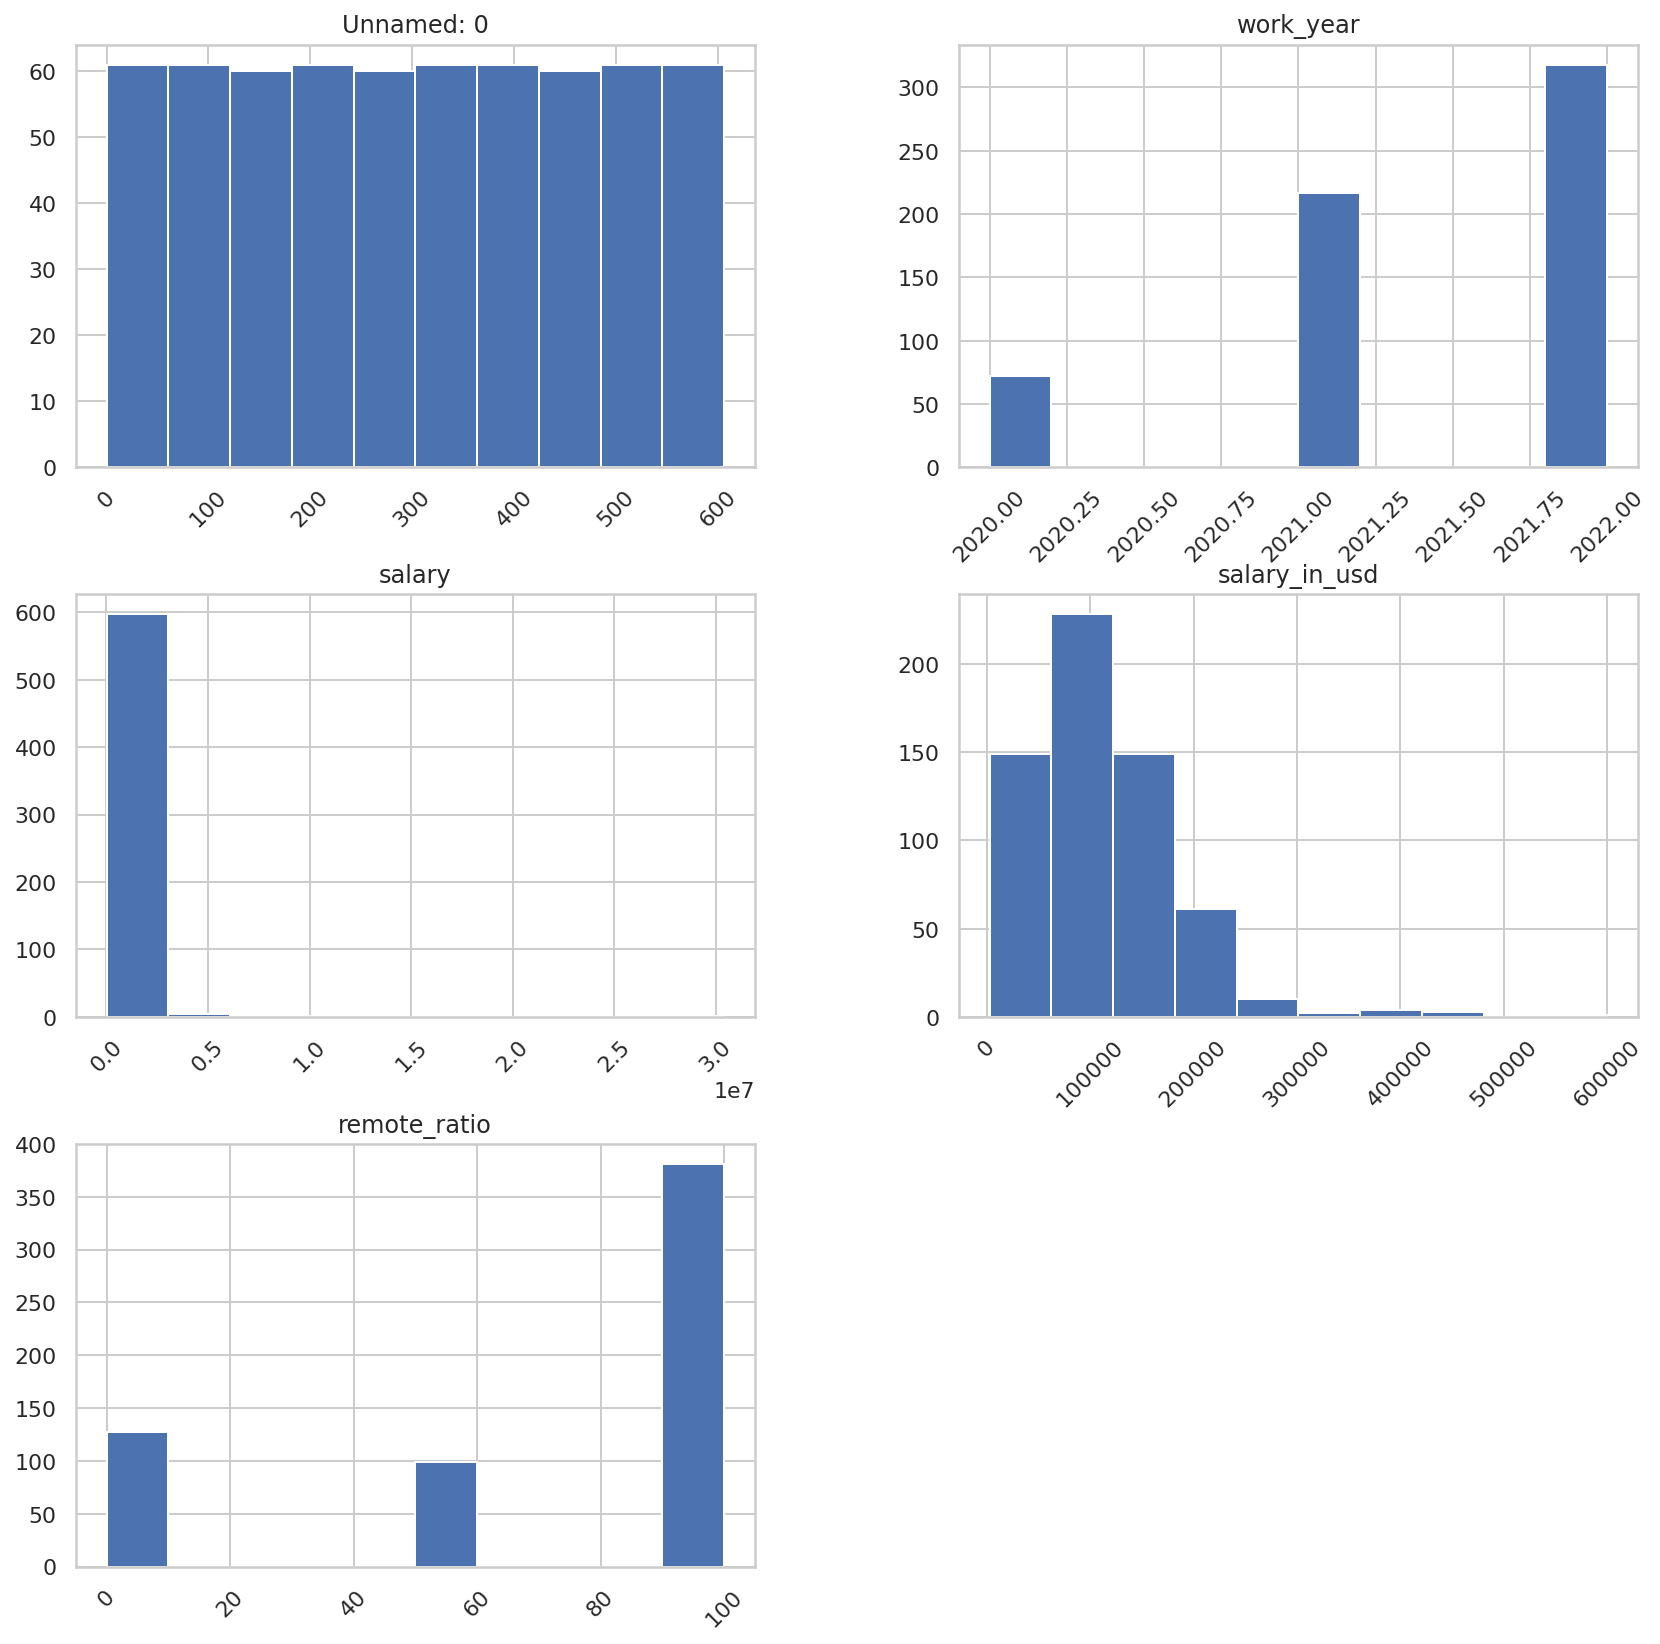

In [ ]:
data.hist(figsize=(14,14), xrot=45)
plt.show()

In [ ]:
data.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


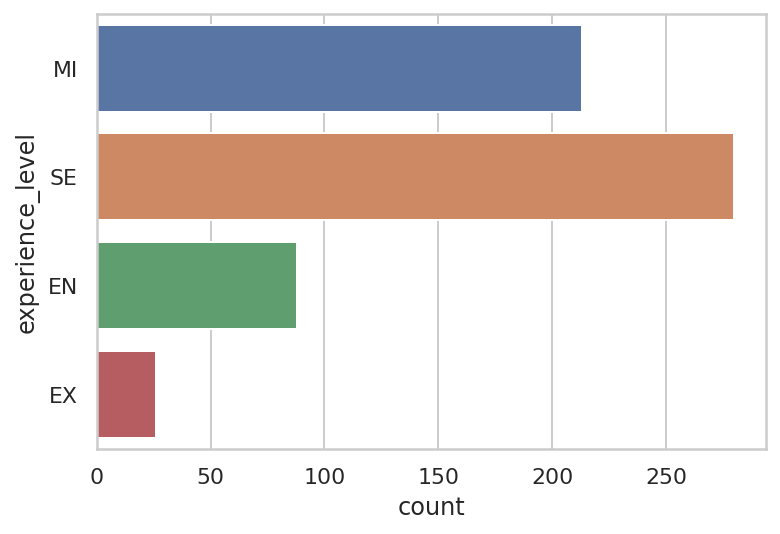

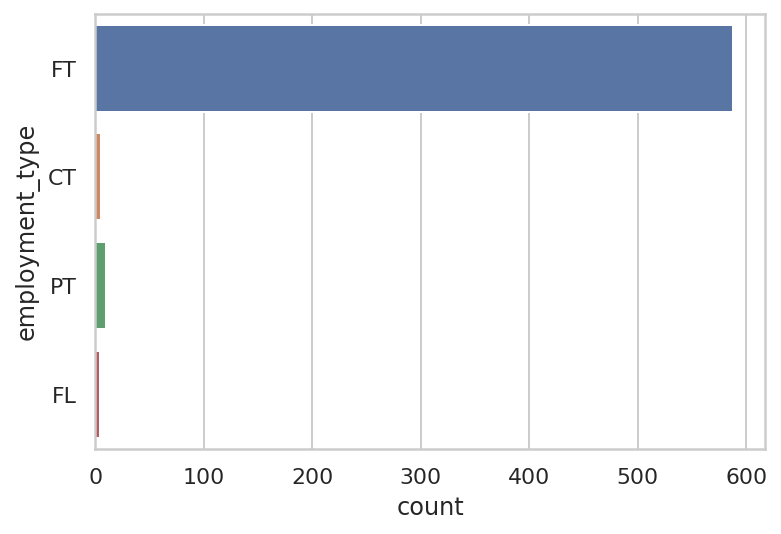

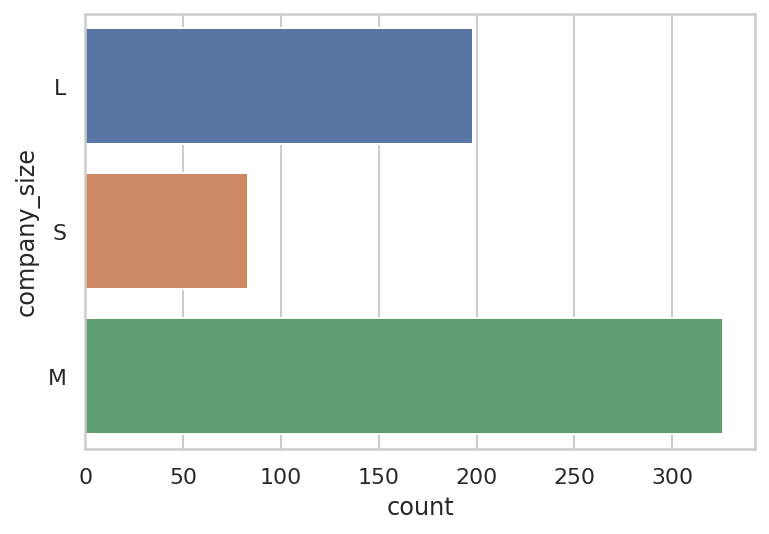

In [ ]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        sns.countplot(y=column, data=data)
        plt.show()

In [26]:
#Lets checks duplicate rows from the data frame and there are (1,12) duplicate rows in data frame.
duplicate_rows_info = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_info.shape)

number of duplicate rows:  (0, 12)


In [28]:
#This are the result of the total null value present before replacing them.
#Lets explore the total null calues in the data frame.
print(data.isnull().sum())

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


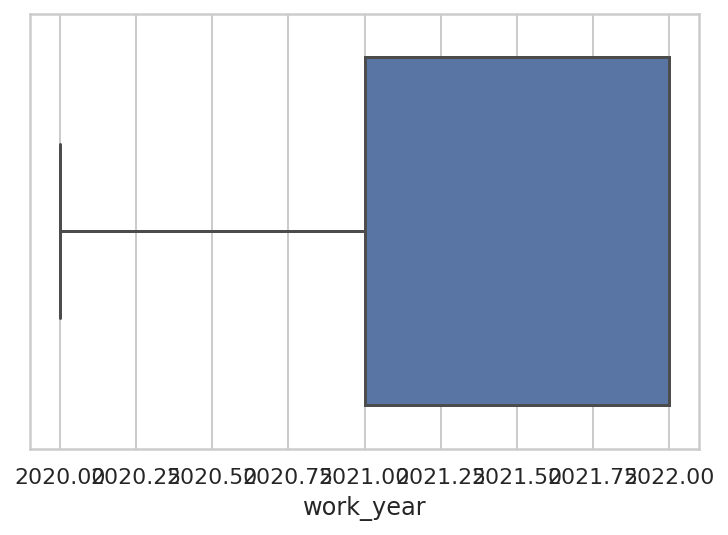

In [30]:
#In the below box plot the some points are outside the box they are none other than outliers.

sns.boxplot(x=data['work_year'])

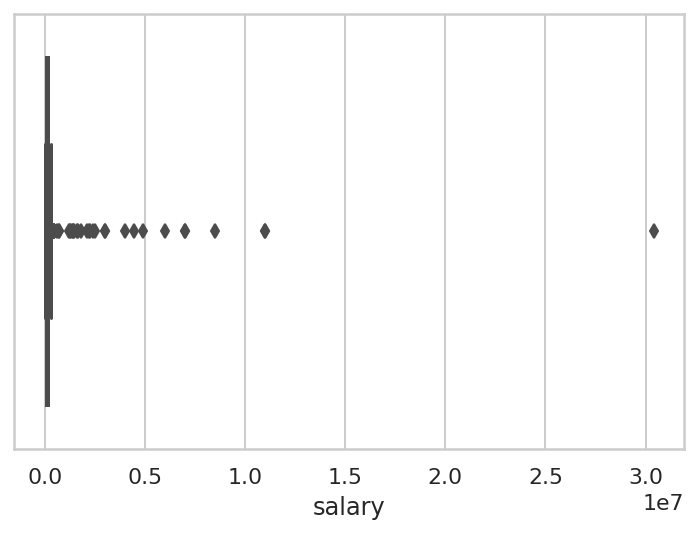

In [32]:
sns.boxplot(x=data['salary'])

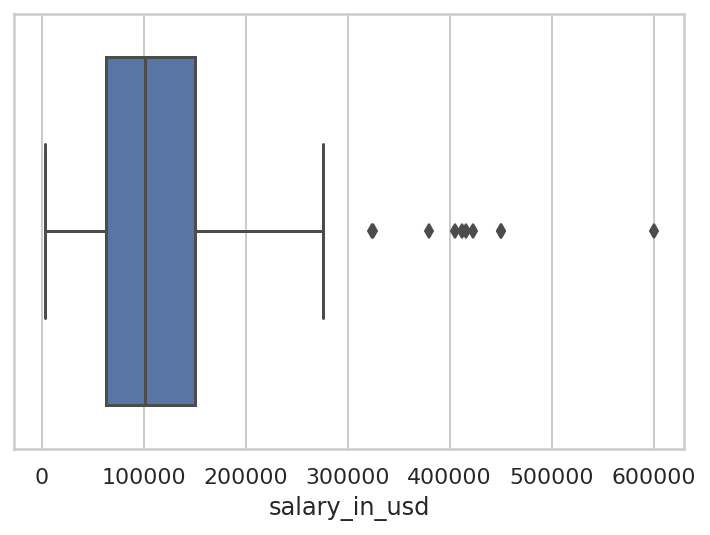

In [33]:
sns.boxplot(x=data['salary_in_usd'])

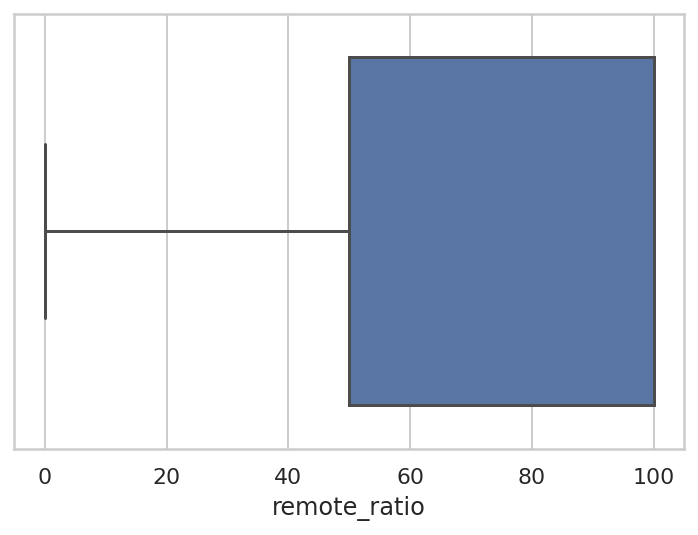

In [34]:
sns.boxplot(x=data['remote_ratio'])

In [35]:
#for removing outlier we are using following method and that is represented as follow
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Unnamed: 0         303.0
work_year            1.0
salary           95000.0
salary_in_usd    87274.0
remote_ratio        50.0
dtype: float64


In [36]:

data= data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape
     

(563, 12)

In [38]:
data.describe

<bound method NDFrame.describe of      Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD      

In [40]:
data.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,563.000000,563.000000,563.000000,563.00000,563.000000
mean,311.698046,2021.442274,113104.868561,111726.16341,71.403197
std,174.506853,0.683920,59369.779786,56921.66283,40.779580
min,0.000000,2020.000000,4000.000000,2859.00000,0.000000
25%,161.500000,2021.000000,65000.000000,68714.00000,50.000000
50%,318.000000,2022.000000,108800.000000,105000.00000,100.000000
75%,461.500000,2022.000000,150630.000000,150000.00000,100.000000
max,606.000000,2022.000000,300000.000000,276000.00000,100.000000


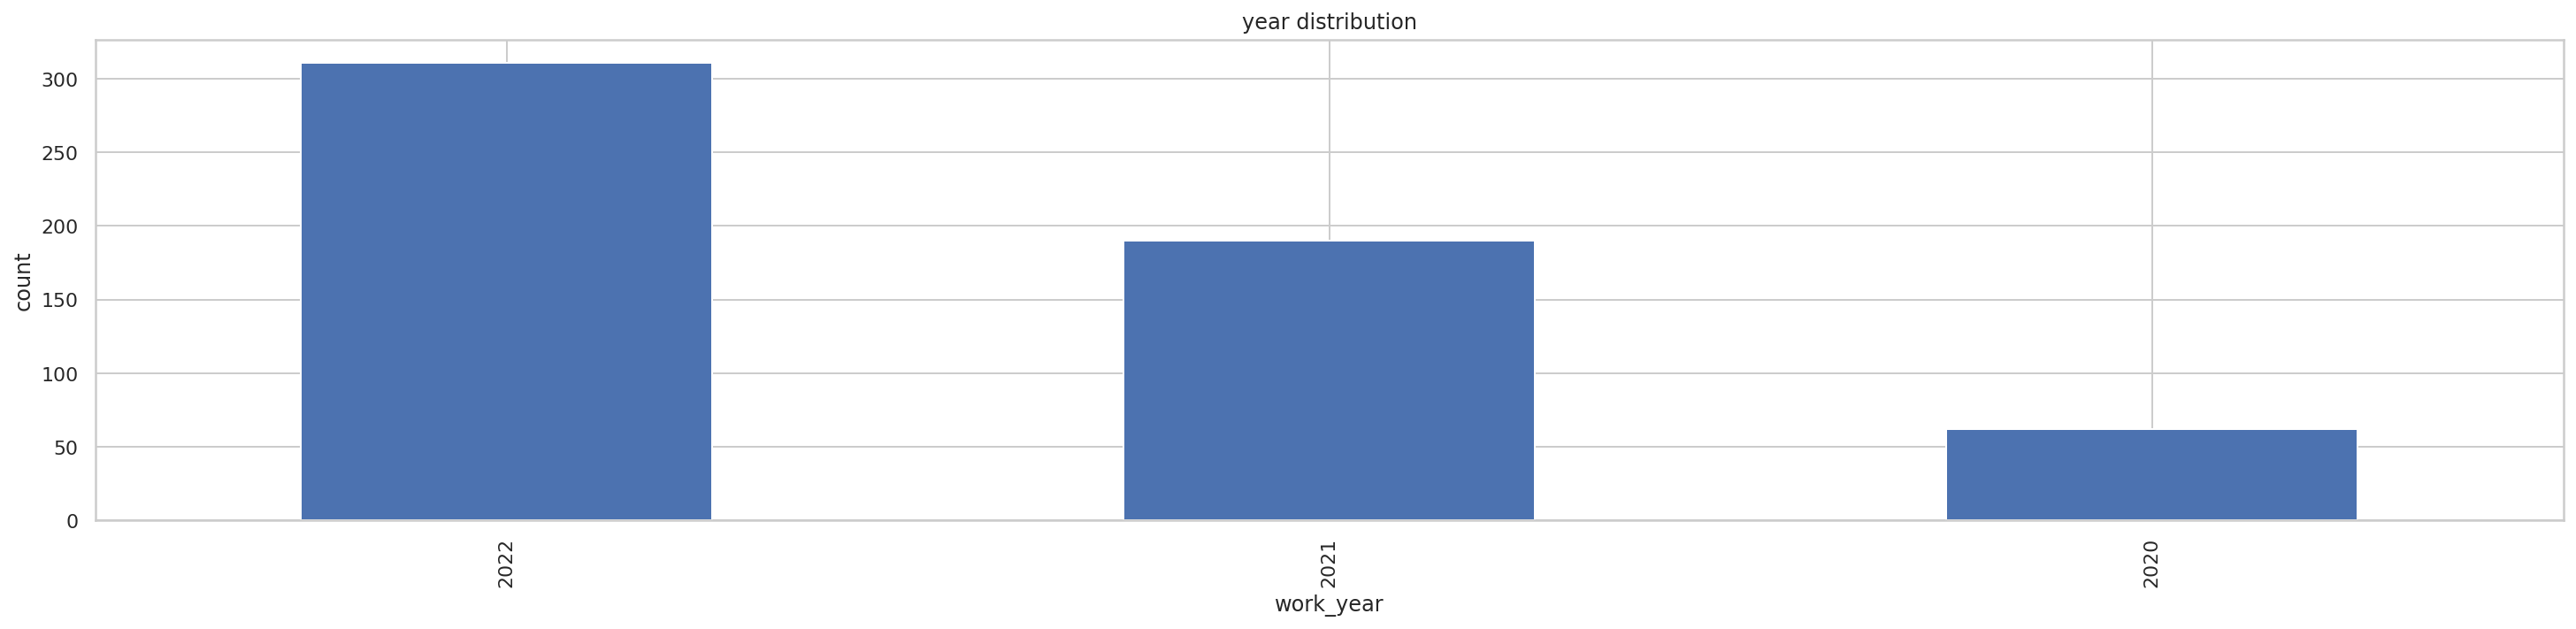

In [44]:
#Lets explore the country_code vs total counts of them.This plot showing the USA is the top country that has more number of counts and respective startsups.
data.work_year.value_counts().nlargest(40).plot(kind='bar', figsize=(25,5))
plt.title("year distribution")
plt.ylabel('count')
plt.xlabel('work_year');

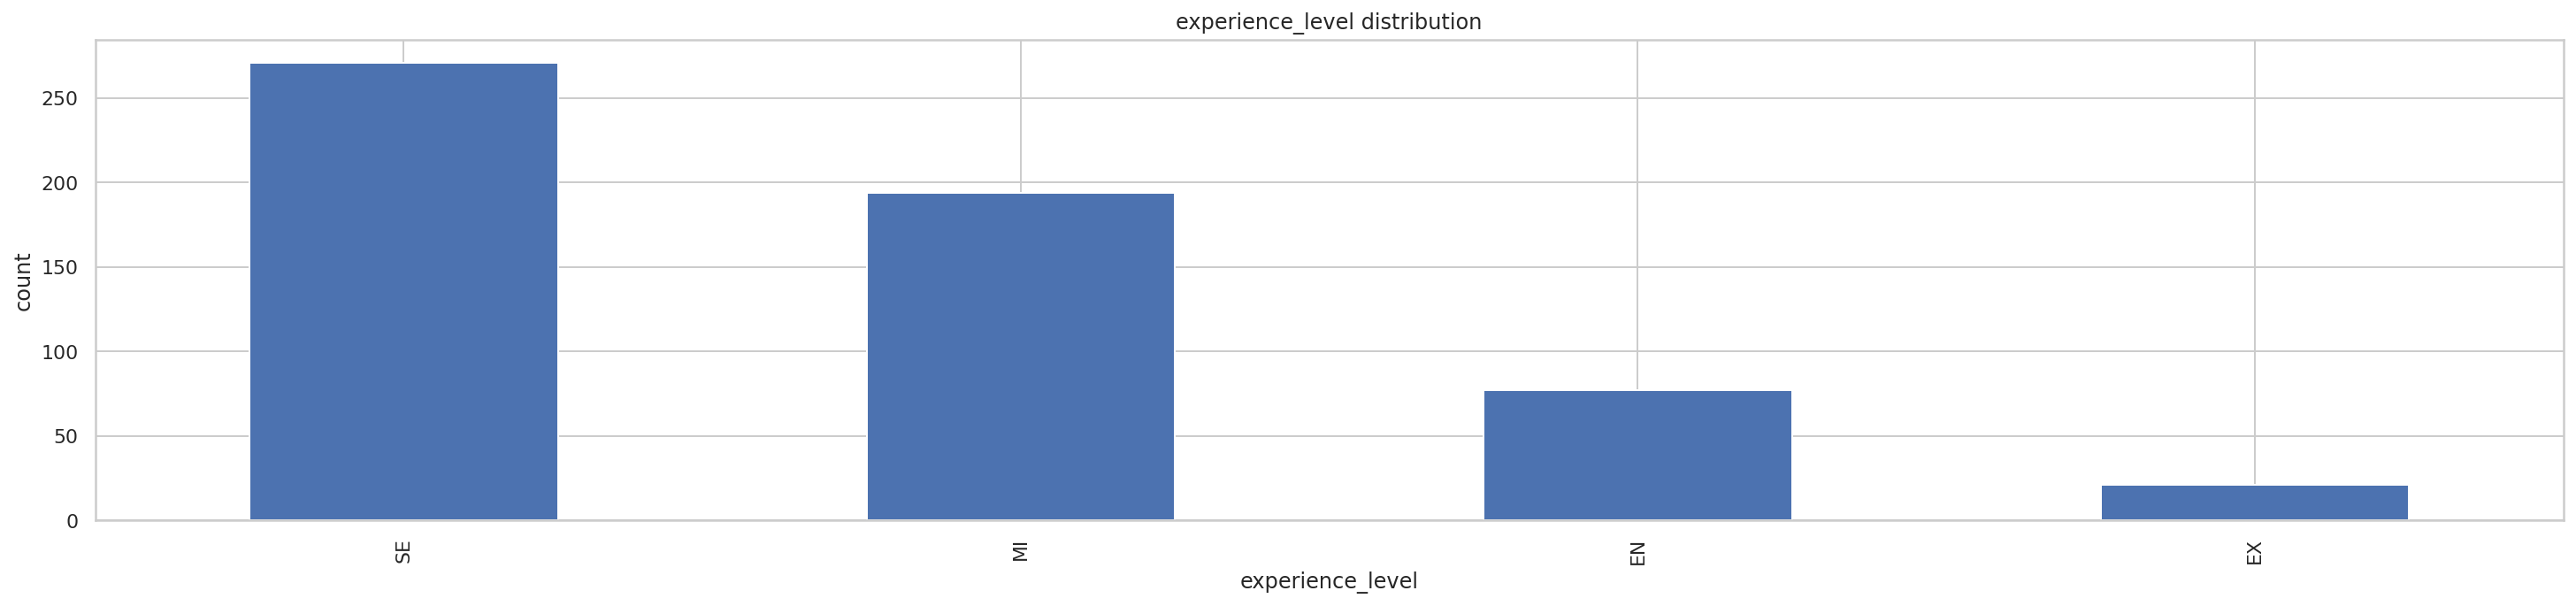

In [45]:
#Lets explore the country_code vs total counts of them.This plot showing the USA is the top country that has more number of counts and respective startsups.
data.experience_level.value_counts().nlargest(40).plot(kind='bar', figsize=(25,5))
plt.title("experience_level distribution")
plt.ylabel('count')
plt.xlabel('experience_level');

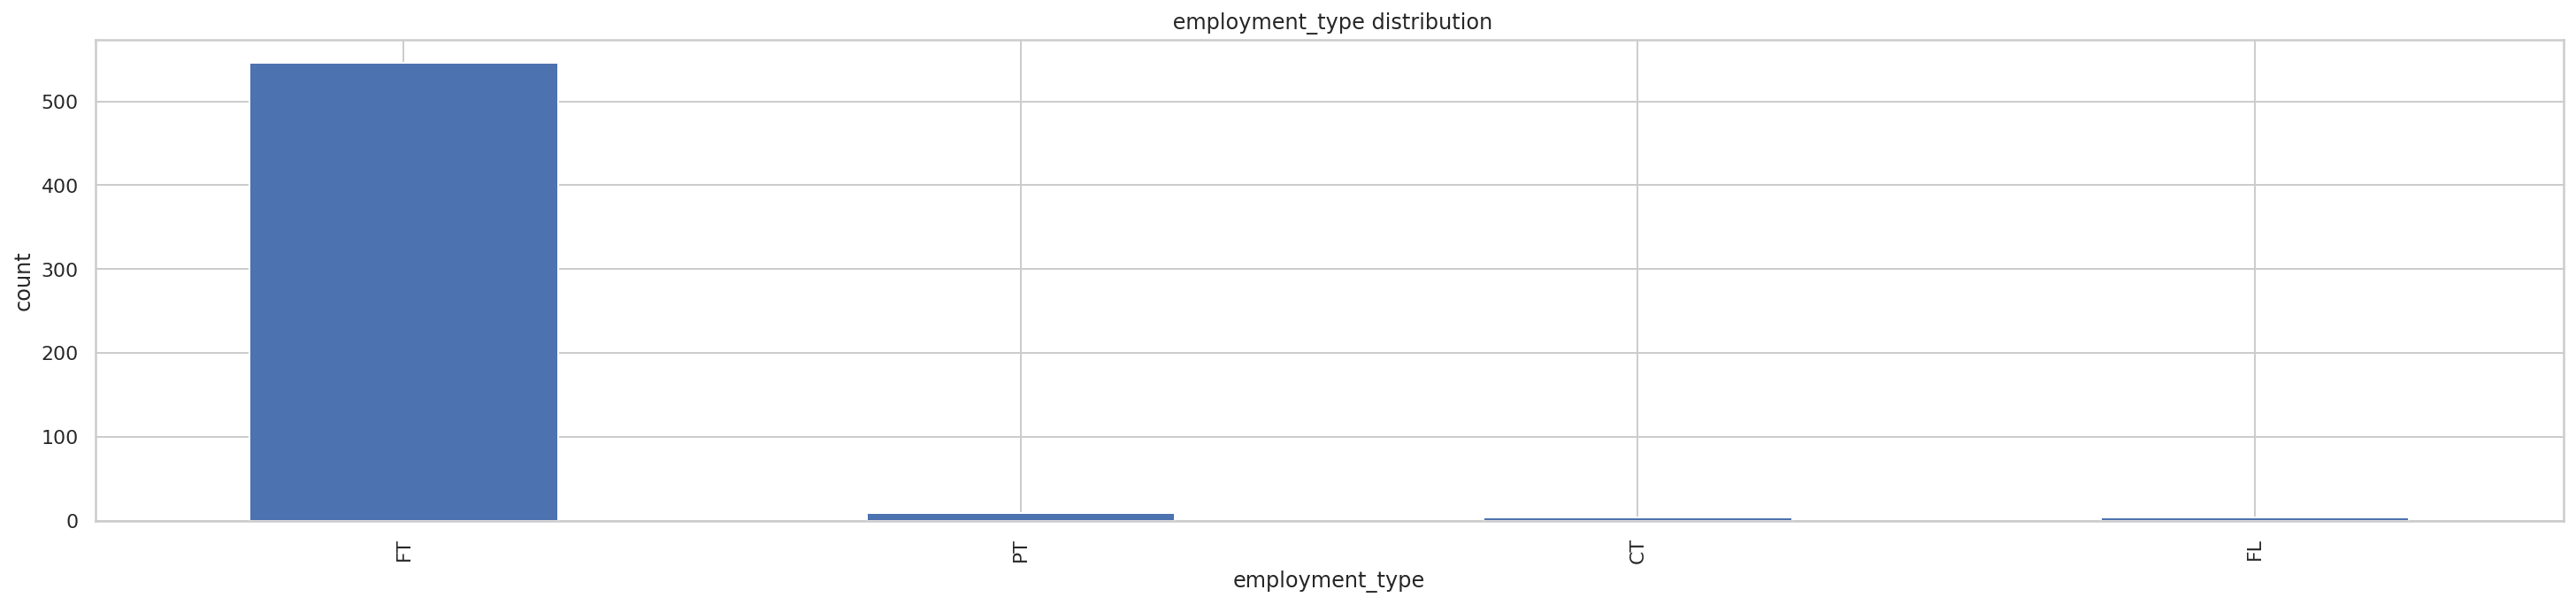

In [46]:
data.employment_type.value_counts().nlargest(40).plot(kind='bar', figsize=(25,5))
plt.title(" employment_type distribution")
plt.ylabel('count')
plt.xlabel('employment_type');

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          563 non-null    int64 
 1   work_year           563 non-null    int64 
 2   experience_level    563 non-null    object
 3   employment_type     563 non-null    object
 4   job_title           563 non-null    object
 5   salary              563 non-null    int64 
 6   salary_currency     563 non-null    object
 7   salary_in_usd       563 non-null    int64 
 8   employee_residence  563 non-null    object
 9   remote_ratio        563 non-null    int64 
 10  company_location    563 non-null    object
 11  company_size        563 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.2+ KB


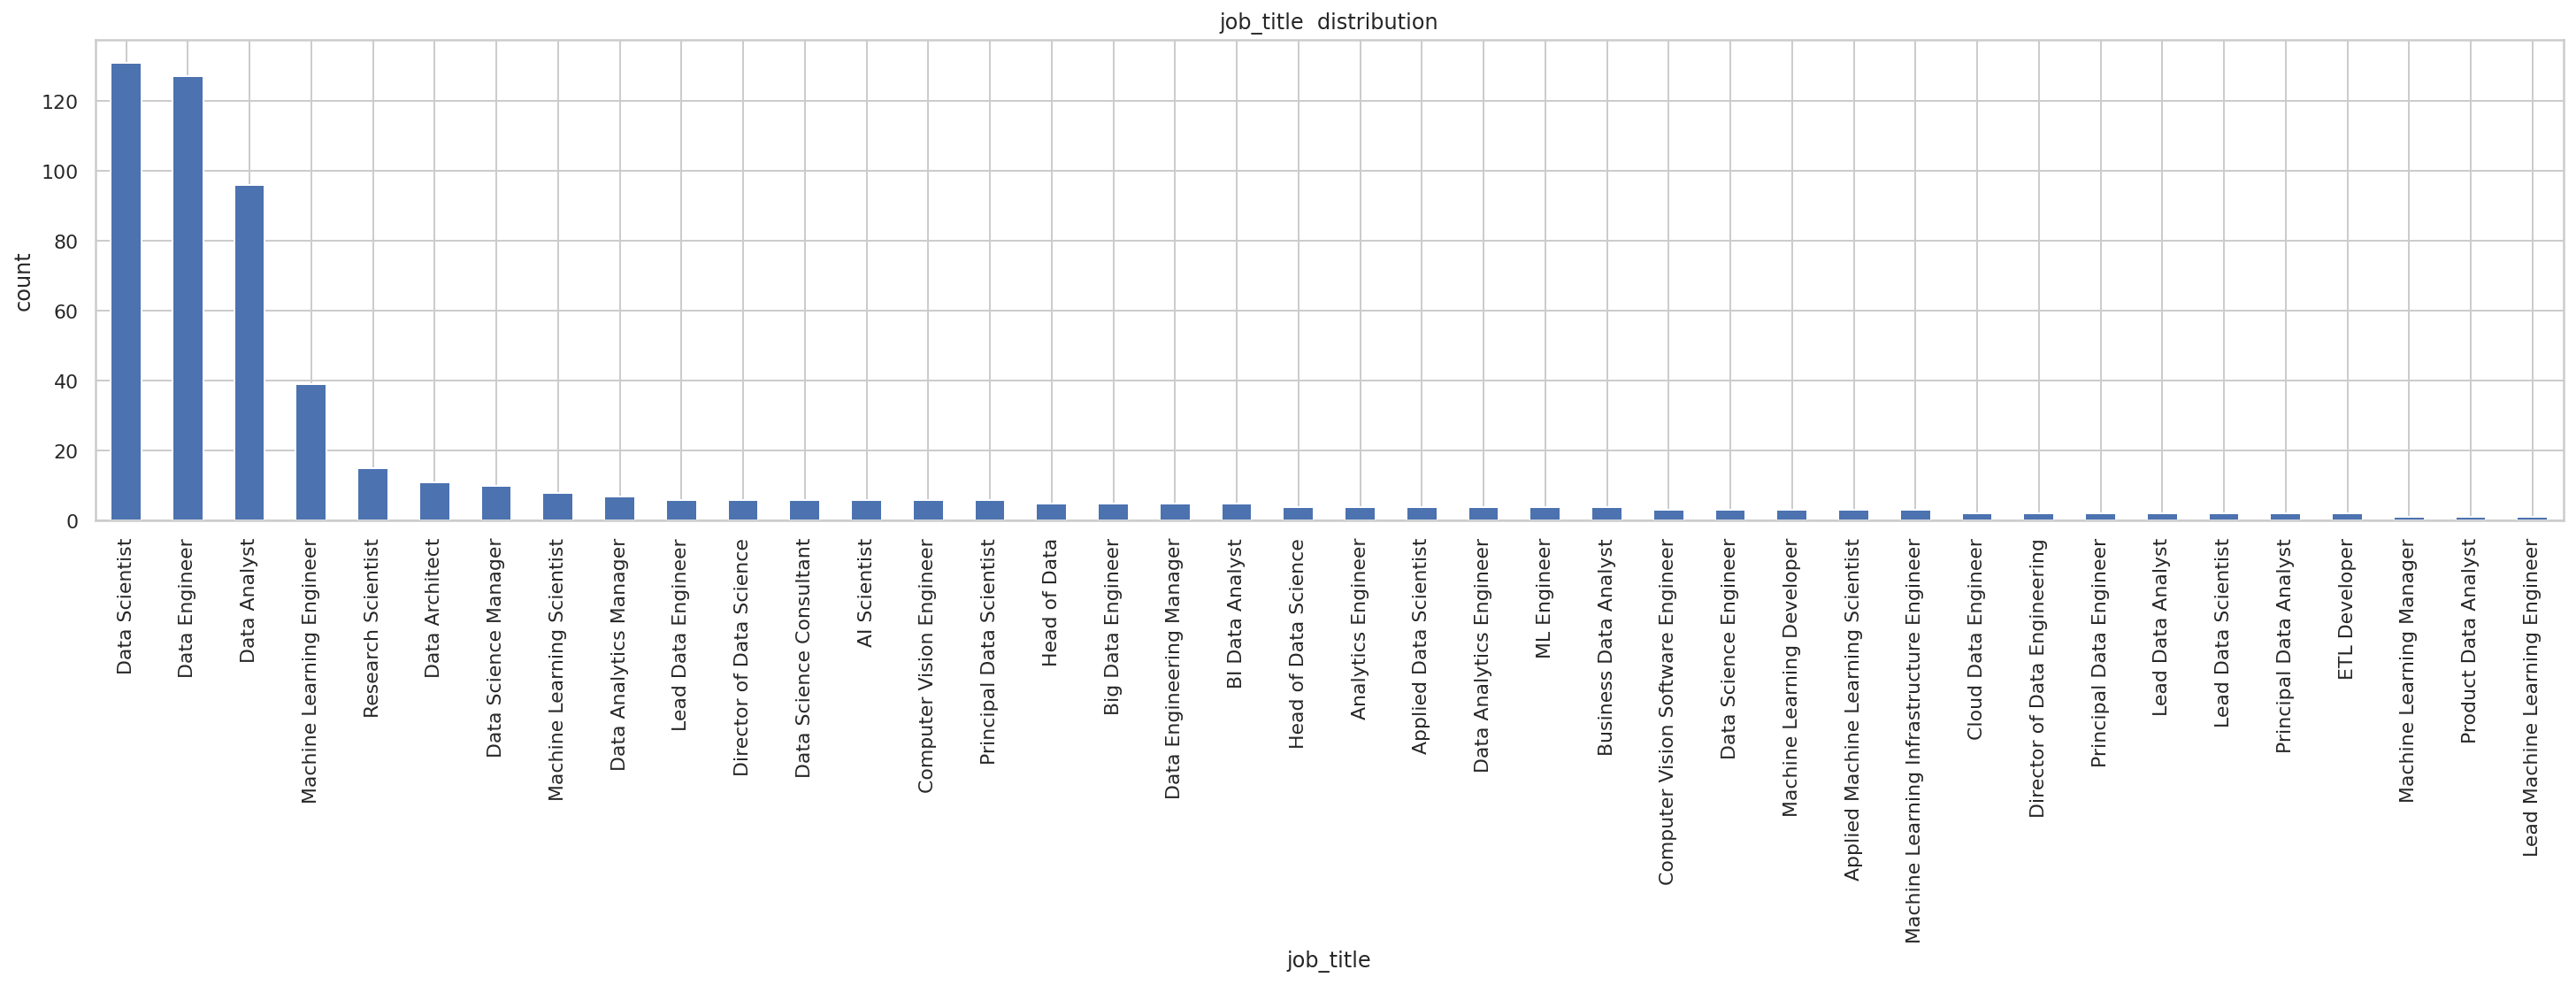

In [49]:
data.job_title.value_counts().nlargest(40).plot(kind='bar', figsize=(25,5))
plt.title("job_title  distribution")
plt.ylabel('count')
plt.xlabel('job_title');

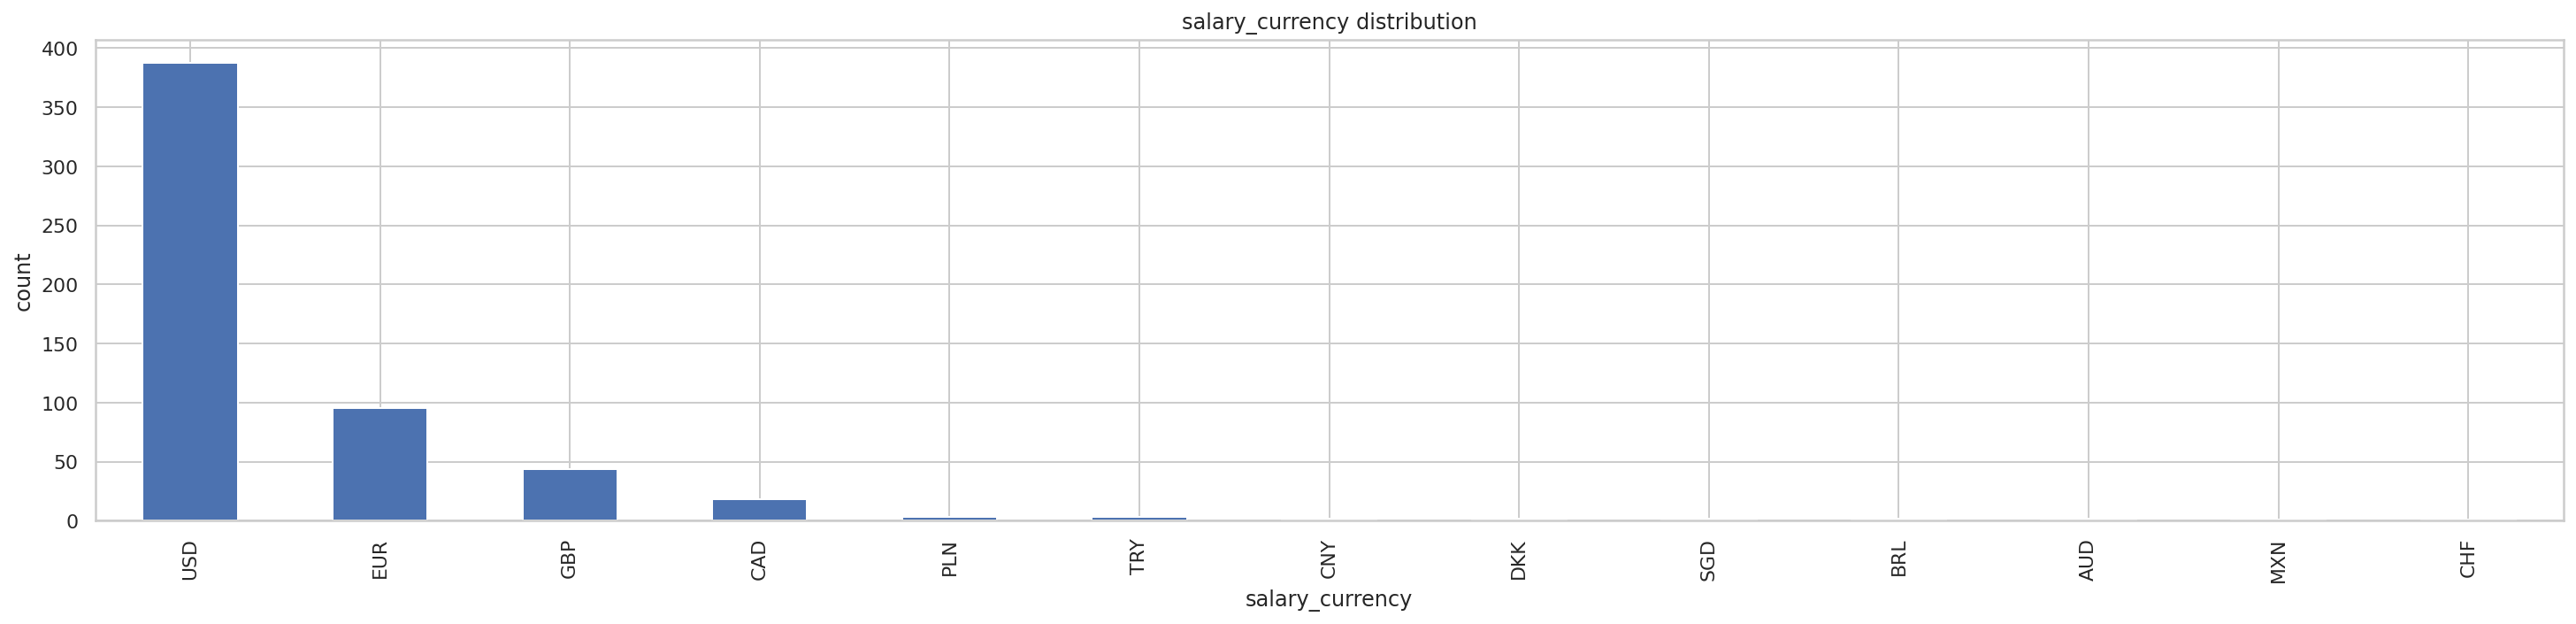

In [50]:
data.salary_currency.value_counts().nlargest(40).plot(kind='bar', figsize=(25,5))
plt.title("salary_currency distribution")
plt.ylabel('count')
plt.xlabel('salary_currency');

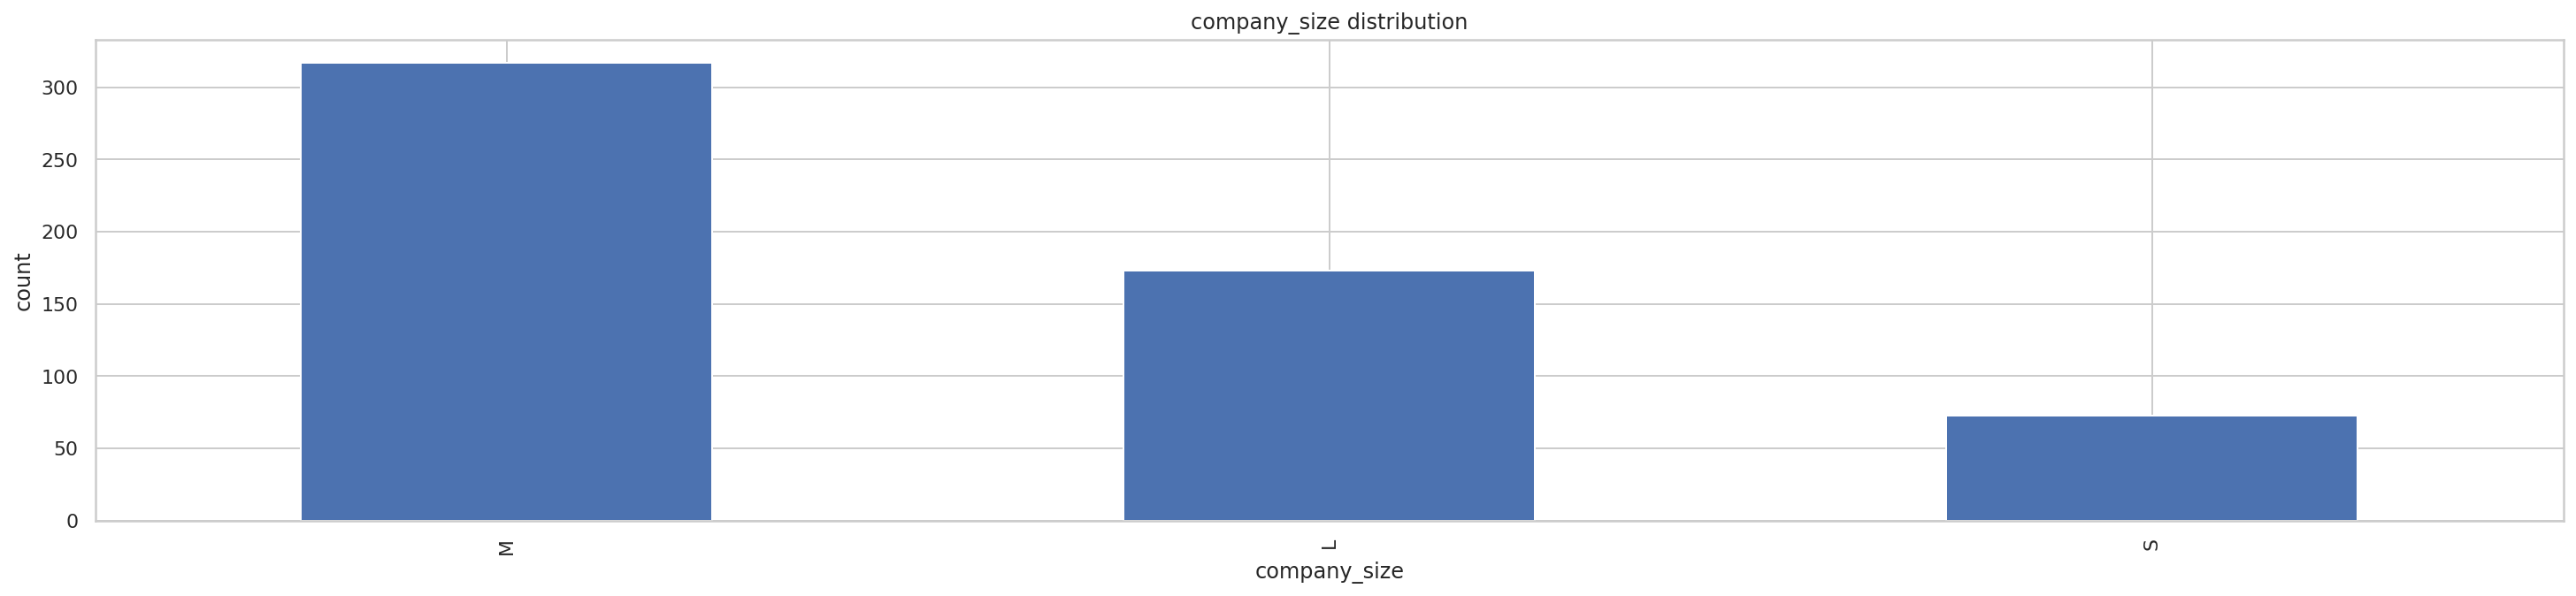

In [51]:
data.company_size.value_counts().nlargest(40).plot(kind='bar', figsize=(25,5))
plt.title("company_size distribution")
plt.ylabel('count')
plt.xlabel('company_size');

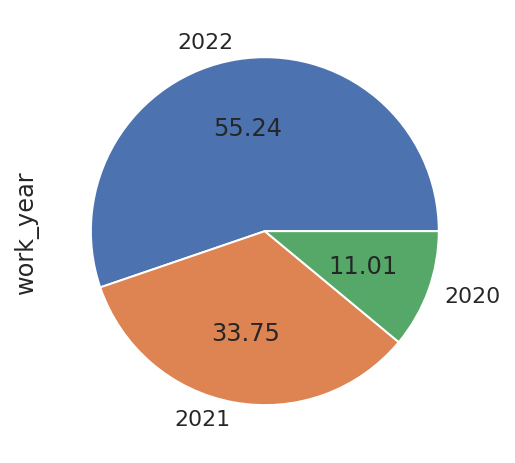

In [52]:
data['work_year'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

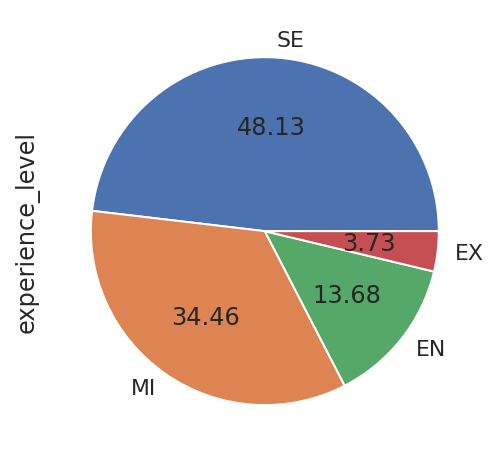

In [53]:
data['experience_level'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

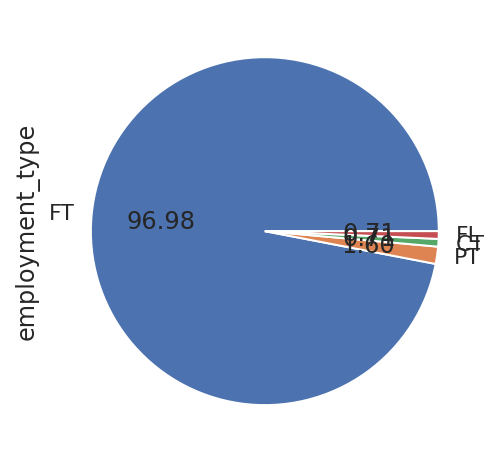

In [54]:
data['employment_type'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

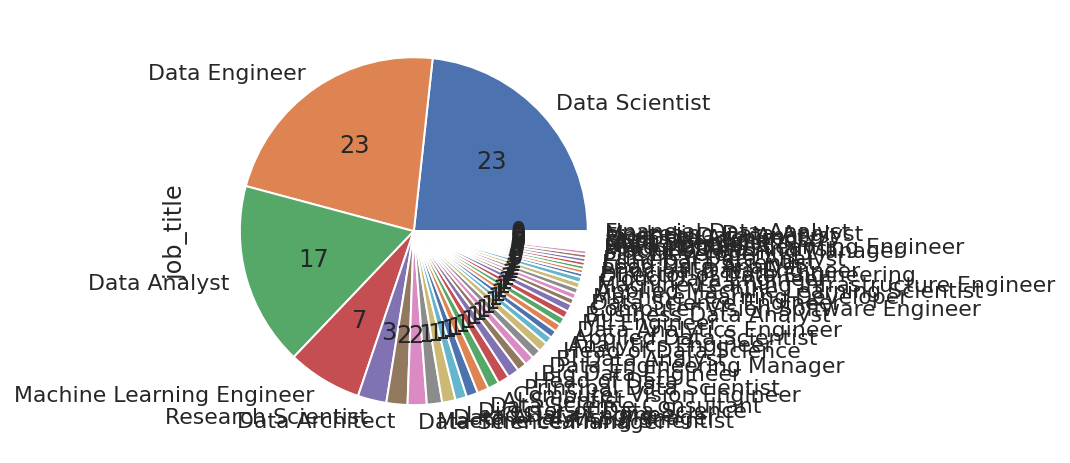

In [59]:
data['job_title'].value_counts().plot(kind="pie", autopct="%.f")
plt.show()

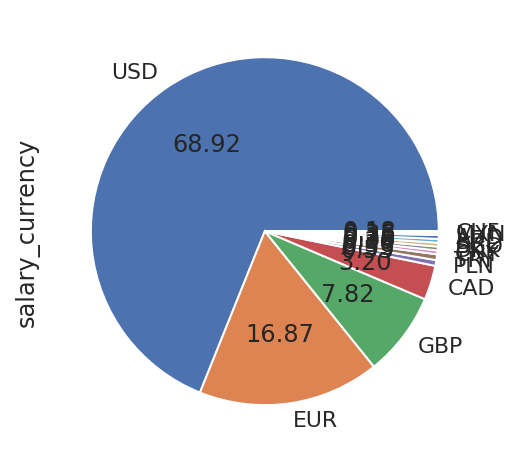

In [61]:
data['salary_currency'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          563 non-null    int64 
 1   work_year           563 non-null    int64 
 2   experience_level    563 non-null    object
 3   employment_type     563 non-null    object
 4   job_title           563 non-null    object
 5   salary              563 non-null    int64 
 6   salary_currency     563 non-null    object
 7   salary_in_usd       563 non-null    int64 
 8   employee_residence  563 non-null    object
 9   remote_ratio        563 non-null    int64 
 10  company_location    563 non-null    object
 11  company_size        563 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.2+ KB


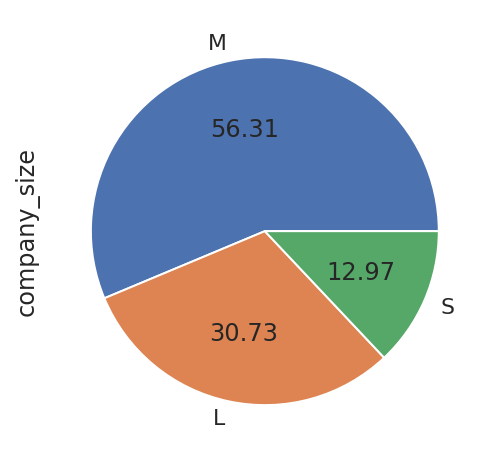

In [63]:
data['company_size'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

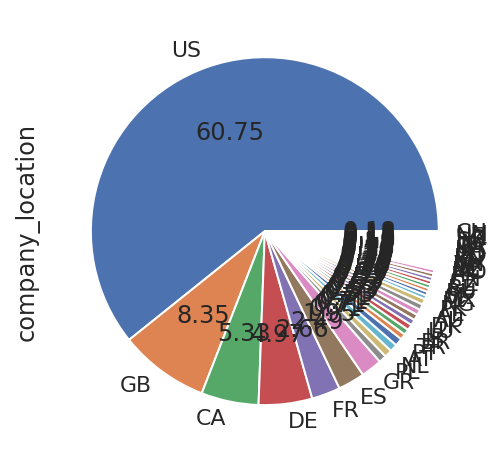

In [64]:
data['company_location'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

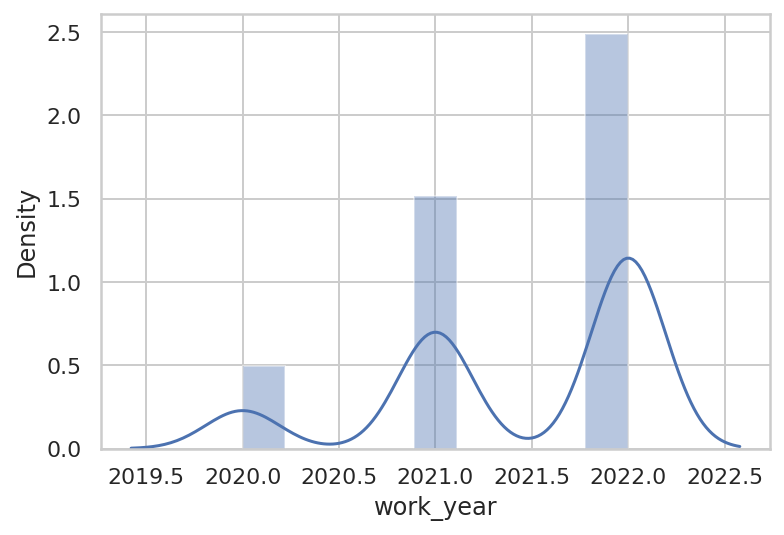

In [65]:
#2) Distplot
sns.distplot(data['work_year']) 
plt.show()

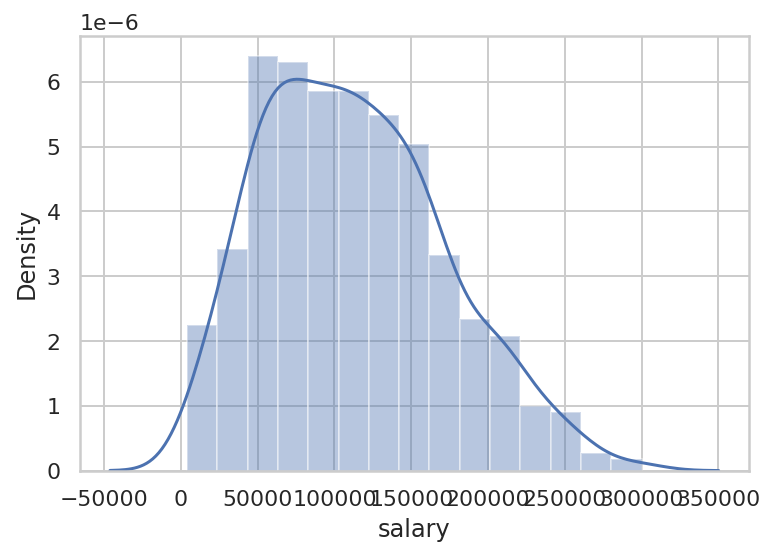

In [67]:
sns.distplot(data['salary']) 
plt.show()

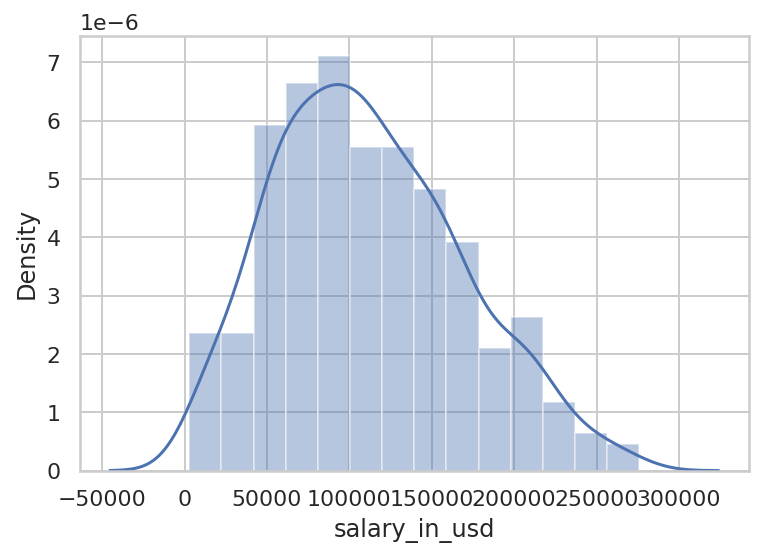

In [71]:
sns.distplot(data['salary_in_usd']) 
plt.show()

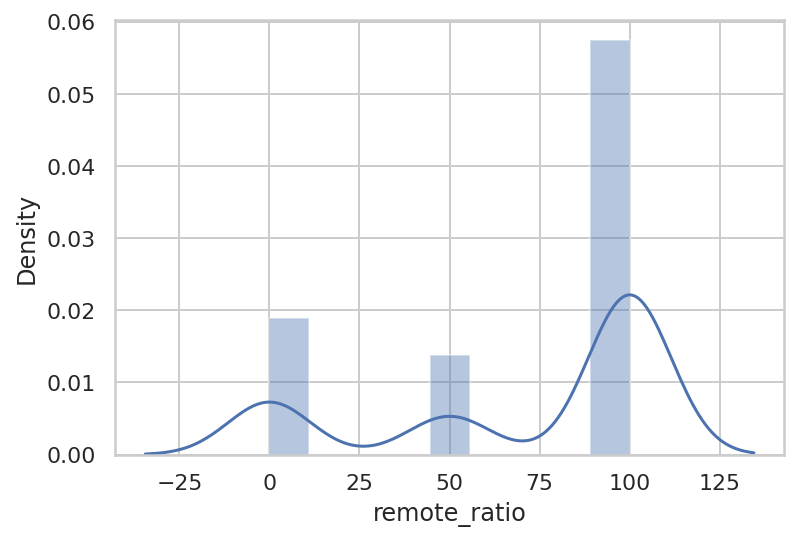

In [72]:
sns.distplot(data['remote_ratio']) 
plt.show()

**Bivariate/ Multivariate Analysis**